In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug  1 13:17:41 2018

@author: st186052
"""

#!/bin/env python
import numpy as np
import scipy.misc
from scipy.fftpack import dct, idct
import imageio
import cv2
import pandas as pd


%matplotlib inline
import io
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
#import urllib2
import urllib3
#import urllib.request, urllib.error

import IPython

#%pylab inline
#import matplotlib.pyplot as plt
import matplotlib.image as mpimg

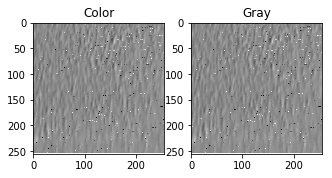

In [3]:
    

#image1 = 'C:/Users/ST186052/Documents/git18b/R/R_gear_FFT_02/image/L1_lowerRight128_afterRem200micrometer.png'
#image1 = 'C:/Users/ST186052/Documents/git18b/R/R_gear_FFT_02/image/L1_lowerRight256_afterRem100micrometer.png'
image1 = '/Users/jm186072/Documents/Jeetendra/Projects/1Japan-Presales/L1_lowerRight256_afterRem100micrometer.png'
#size=128, 128
size=256, 256

im        = Image.open(image1)
img_color = im.resize((size),Image.ANTIALIAS)
img_grey  = img_color.convert('L')

fig = plt.figure(figsize=(8, 8))

plt.subplot(1, 3,  1)
plt.imshow(img_color)
plt.title("Color")

plt.subplot(1, 3,  2)
plt.imshow(img_grey)
plt.title("Gray")

pixels = np.array(img_grey, dtype=np.float)
    

In [5]:
pixels.shape

(256, 256)

In [12]:
dct_size = pixels.shape[0]
reconstructed_images = []

#2D Cosine Transform of Image
dct = fftpack.dct(fftpack.dct(pixels.T, norm='ortho').T, norm='ortho')

In [73]:
dct1.shape

(4, 4)

In [66]:

dct1_copy = dct1.copy()

In [74]:
dct1_copy

array([[ 3.59750273e+04, -5.41357662e+02,  2.30616251e+02,
         0.00000000e+00],
       [-4.32914867e+02, -8.02426675e+01,  1.35523063e+01,
         0.00000000e+00],
       [ 4.61624185e+02,  1.26999883e+02, -6.75133901e+01,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

New Iteration-->  0
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
CLIPPED IMAGE 

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
New Iteration-->  1
[[35975.02734375     0.             0.             0.        ]
 [    0.             0.             0.             0.        ]
 [    0.             0.             0.             0.        ]
 [    0.             0.             0.             0.        ]]
CLIPPED IMAGE 

[[255. 255. 255. 255.]
 [255. 255. 255. 255.]
 [255. 255. 255. 255.]
 [255. 255. 255. 255.]]
New Iteration-->  2
[[35975.02734375  -541.35766246     0.             0.        ]
 [ -432.91486749   -80.24266749     0.             0.        ]
 [    0.             0.             0.             0.        ]
 [    0.             0.             0.             0.        ]]
CLIPPED IMAGE 

[[255. 255. 255. 255.]
 [255. 255. 255. 255.]
 [255. 255. 255. 255.]
 [255. 255. 255. 255.]]
New Iteration-->  3
[[ 3.59750273e+04 -5.41357662e+02  2.30616251e+02  0.00000

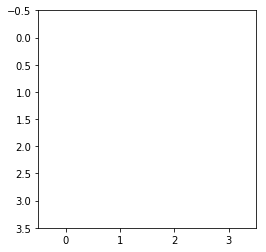

In [104]:
cnt = 4
for ii in range(4):
    dct1_copy = dct1.copy()
    
    dct1_copy[ii:,:] = 0
    dct1_copy[:,ii:] = 0
    print("New Iteration--> ", ii)
    print(dct1_copy)
    
    # Reconstructed image
    # Get 2D Inverse Cosine Transform of Image
    r_img1 = fftpack.idct(fftpack.idct(dct1_copy.T, norm='ortho').T, norm='ortho')
    
    #print("r_img1",'\n')
    #print(r_img1)
    
    img1 = r_img1.clip(0, 255)
    
    print("CLIPPED IMAGE",'\n')
    print(img1)
    plt.imshow(Image.fromarray(img1))
    #    img = r_img.clip(0, 180)
    #img = img.astype('uint8')
    #reconstructed_image = Image.fromarray(img)

    # Create a list of images
    #reconstructed_images.append(reconstructed_image);

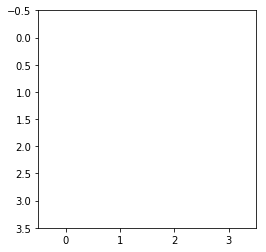

In [80]:
dct1_copy
plt.imshow(Image.fromarray(img1))

In [13]:
for ii in range(dct_size):
    dct_copy = dct.copy()
    
    dct_copy[ii:,:] = 0
    dct_copy[:,ii:] = 0
    
    # Reconstructed image
    # Get 2D Inverse Cosine Transform of Image
    r_img = fftpack.idct(fftpack.idct(dct_copy.T, norm='ortho').T, norm='ortho')
    
    img = r_img.clip(0, 255)
#    img = r_img.clip(0, 180)
    img = img.astype('uint8')
    reconstructed_image = Image.fromarray(img)

    # Create a list of images
    reconstructed_images.append(reconstructed_image);
    
r_img.shape

(256, 256)

In [41]:
print(type(dct))
print('DCT SHAPE',dct.shape)
print('DCT SIZE',dct.size)
print('DCT RAVEL SIZE',dct.ravel().size)
print('DCT RAVEL SHAPE',dct.ravel().shape)
type(dct.ravel())
print(dct[0][1])
print('ABS VALUE of 1 DCT CO-EFFICIENT',np.abs(dct[0][1]))
print('LOG OF ABS VALUE of 1 DCT CO-EFFICIENT',np.log10(np.abs(dct[0][1])))

<class 'numpy.ndarray'>
DCT SHAPE (256, 256)
DCT SIZE 65536
DCT RAVEL SIZE 65536
DCT RAVEL SHAPE (65536,)
-541.3576624557993
ABS VALUE of 1 DCT CO-EFFICIENT 541.3576624557993
LOG OF ABS VALUE of 1 DCT CO-EFFICIENT 2.733484288226522


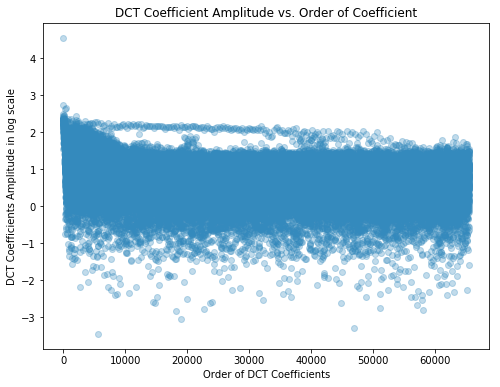

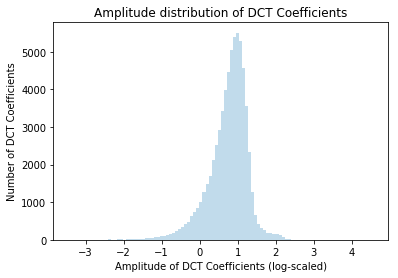

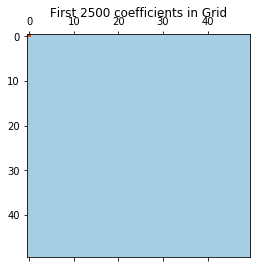

In [48]:
   
plt.figure(figsize=(8, 6));
plt.scatter(range(dct.ravel().size), np.log10(np.abs(dct.ravel())), c='#348ABD', alpha=.3);
plt.title('DCT Coefficient Amplitude vs. Order of Coefficient');
plt.xlabel('Order of DCT Coefficients');
plt.ylabel('DCT Coefficients Amplitude in log scale');

plt.figure(figsize=(6,4))
plt.hist(np.log10(np.abs(dct.ravel())), bins=100, color='#348ABD', alpha=.3, histtype='stepfilled');
plt.xlabel('Amplitude of DCT Coefficients (log-scaled)');
plt.ylabel('Number of DCT Coefficients');
plt.title('Amplitude distribution of DCT Coefficients');

plt.matshow(np.abs(dct[:50, :50]), cmap=plt.cm.Paired);
plt.title('First 2500 coefficients in Grid');

In [18]:
#fig = plt.figure(figsize=(32, 32))
#for ii in range(1):
#    plt.subplot(1,  1, ii + 1)
#    plt.imshow(reconstructed_images[ii], cmap=plt.cm.gray)
#    plt.grid(False);
#    plt.xticks([]);
#    plt.yticks([]);
#    plt.title("Image #" + str(ii) ) 

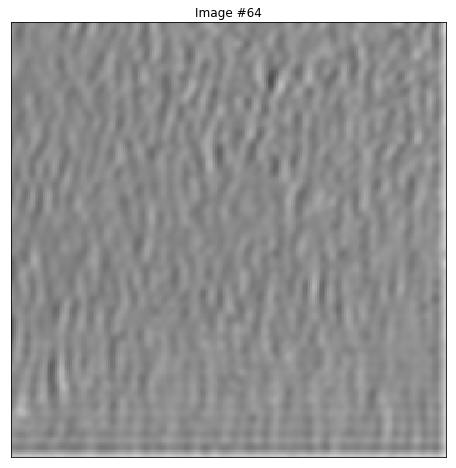

In [19]:
fig = plt.figure(figsize=(8, 8))

for ii in range(1):
    plt.imshow(reconstructed_images[64], cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("Image #" + str(64+ii) )       

In [20]:
              
print(len(reconstructed_images))              

256


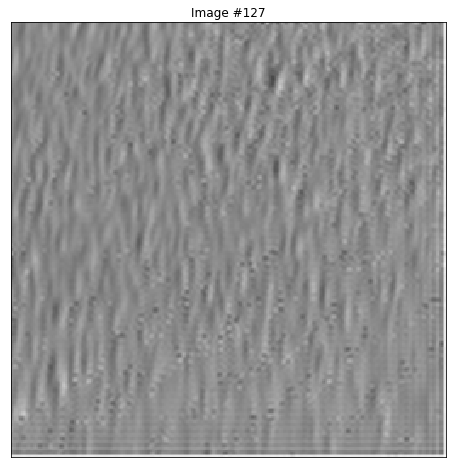

In [21]:
              
fig = plt.figure(figsize=(8, 8))
for ii in range(1):
#    plt.subplot(1, 1, ii+1)
    plt.imshow(reconstructed_images[128-1], cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("Image #" + str(128-1) )       
 

In [ ]:
             
              
# hist              
#plt.figure()
#plt.hist(dct, range=(-10000, 10000))   
#axes = plt.gca()
#axes.set_ylim([0,20])  
#plt.figure()
#plt.hist(dct, range=(-3000, 3000))   
#axes = plt.gca()
#axes.set_ylim([0,20])  
#plt.figure()
#plt.hist(dct, range=(-1000, 1000))   
#axes = plt.gca()
#axes.set_ylim([0,20])  

<Figure size 432x288 with 0 Axes>

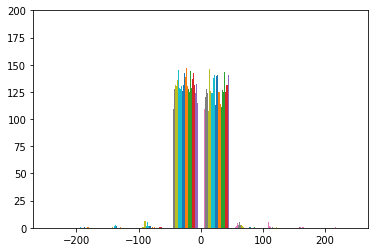

<Figure size 432x288 with 0 Axes>

In [106]:
plt.figure()
plt.hist(dct, range=(-250, 250))   
axes = plt.gca()
axes.set_ylim([0,200])  
#plt.figure()
#plt.hist(dct, range=(-250, 250))     
#plt.hist(dct[:50, :50])     
plt.figure()

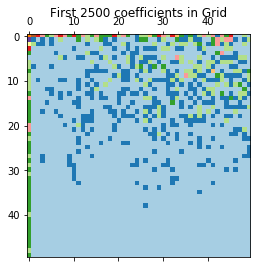

In [89]:
dct2 = dct.copy()
#print(dct2[:1, :1])
dct2[:1, :1] = 0.01 * dct2[:1, :1]
#print(dct2[:10, :10])
plt.matshow(np.abs(dct2[:50, :50]), cmap=plt.cm.Paired);
plt.title('First 2500 coefficients in Grid');

In [91]:
print(LPF_threA,LPF_threB,LPF_threC)

127 50 150


In [101]:
print(np.abs(dct[0,:]))

[3.59750273e+04 5.41357662e+02 2.30616251e+02 2.15265842e+02
 1.76073349e+02 1.27011424e+02 2.12475349e+02 2.31425856e+02
 2.22277789e+02 1.78000431e+02 2.33287626e+02 1.60741354e+02
 2.17910159e+02 1.34051208e+02 1.62448822e+02 2.09781672e+02
 1.57605711e+02 1.65592317e+02 1.59928124e+02 2.27876008e+02
 1.27468588e+02 2.14090468e+02 1.44455726e+02 3.44447451e+01
 7.13145510e+01 1.12144770e+02 1.00130623e+02 2.77897722e+02
 1.73361879e+02 2.56195117e+02 2.15648098e+02 1.02464805e+02
 2.48900689e+02 3.12231746e+02 1.75872298e+02 8.55937305e+01
 1.59737411e+02 5.19385936e+01 1.34306939e+02 1.92829886e+02
 9.91834478e+01 2.11294211e+02 6.84192104e+01 1.85726547e+02
 1.43957541e+02 2.34100133e+02 3.64992817e+01 1.50812638e+01
 9.99716868e+01 3.56339774e+01 9.43894326e+01 1.70246706e+02
 2.35524397e+02 1.33296169e+02 1.56295180e+02 1.93265340e+02
 1.74792946e+02 1.79542718e+01 2.50729356e+01 2.84752268e+02
 1.67720759e+02 1.67211871e+02 1.59309285e+02 1.00170879e+02
 2.70756338e+02 4.003320

In [90]:
reconstructed_images_LPF = []
LPF_threA = 127 # 70 # 0 to 127
LPF_threB = 50 # 75 # 100 # 200 # 1000 # 10000 # 20 # 75 # 25 # 0 to 2000-ish
LPF_threC = 150
print(len(dct[np.where(abs(dct)<LPF_threB)])) # 16084
print(len(dct[np.where(abs(dct)>=LPF_threB)])) # 300

print("First Row >=LPF_threC")
print(np.where(abs(dct[0,:])>=LPF_threC))

print("First Column >=LPF_threC")
print(np.where(abs(dct[:,0])>=LPF_threC))

print("First 10 Rows and Columns")
print(np.round(dct2[:10,:10],0))

64428
1108
First Row >=LPF_threC
(array([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  14,
        15,  16,  17,  18,  19,  21,  27,  28,  29,  30,  32,  33,  34,
        36,  39,  41,  43,  45,  51,  52,  54,  55,  56,  59,  60,  61,
        62,  64,  66,  69,  73,  76,  79,  81,  83,  89,  91,  95,  98,
       102]),)
First Column >=LPF_threC
(array([ 0,  1,  2,  3,  4,  8, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24,
       26, 28, 32, 37, 38, 41, 42, 44, 45, 46, 47, 49, 52, 53, 60, 61, 69,
       74]),)
First 10 Rows and Columns
[[ 360. -541.  231. -215.  176. -127.  212. -231.  222. -178.]
 [-433.  -80.   14.  -70.    5.  -46.  -15. -102.    5.  -18.]
 [ 462.  127.  -68.   82.    1.   80.   -6.   22.   -3.   42.]
 [-234.  -17.  -33.  -20.    4.  -14.  -30.    2.  -31.    4.]
 [ 179.  -30.   37.  -36.    8.  -18.   71.    1.   33.   42.]
 [  15.   21.  -13.   28.  -14.    6.   -1. -100.  -46.    4.]
 [ 109.   -7.   17.  -36.  -19.   14.  -21.   31.   20.    8.]
 [-126

In [25]:
for ii in range(dct_size):
    dct_copy = dct.copy()
    dct_copy[ii:,:] = 0
    dct_copy[:,ii:] = 0
    dct_copy[np.where(abs(dct_copy)<LPF_threB)] = 0
#    dct_copy = 1.5*dct_copy
    # Reconstructed image
    # Get 2D Inverse Cosine Transform of Image
    r_img = fftpack.idct(fftpack.idct(dct_copy.T, norm='ortho').T, norm='ortho')
    
#    img = r_img.clip(0, 255)
    img = r_img.clip( 127-LPF_threA,  128+LPF_threA )
    img = img.astype('uint8')
    reconstructed_image = Image.fromarray(img)

    # Create a list of images
    reconstructed_images_LPF.append(reconstructed_image);    

In [103]:
dct[np.where(abs(dct_copy)<LPF_threB)]

array([-34.44474511,  36.49928169, -15.08126381, ...,  -1.9786489 ,
        31.08706624, -35.59714814])

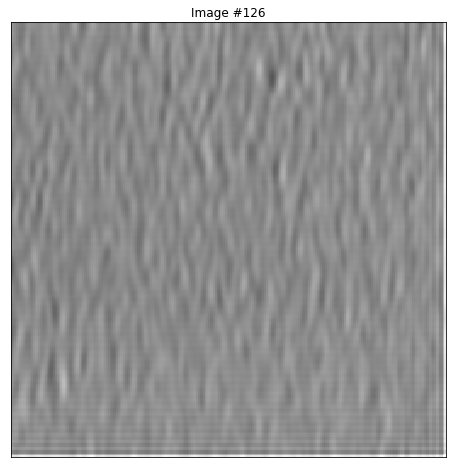

In [26]:
              
    
fig = plt.figure(figsize=(8, 8))
for ii in range(1):
#    plt.subplot(1, 1, ii+1)
    plt.imshow(reconstructed_images_LPF[LPF_threA-1], cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("Image #" + str(LPF_threA-1) )       

In [27]:
# save dct
import csv
#f = open('C:/Users/ST186052/Documents/git18b/R/R_gear_FFT_02/output/dct_px128_v01_0804.csv', 'w')
f = open('/Users/jm186072/Documents/Jeetendra/Projects/1Japan-Presales/output/dct_px256_v03_0804.csv', 'w')
writer = csv.writer(f, lineterminator='\n')
#writer.writerow(list)
writer.writerows(dct)
f.close()

# save png
#pil_img = Image.fromarray(reconstructed_images_LPF[LPF_threA-1])
#pil_img.save('cog_px128_LPF_v02_0805.png')
    
#import matplotlib.image as mpimg
#from PIL import Image
#img = Image.open('image.png').convert('LA')
#img = reconstructed_images_LPF[LPF_threA-1]
#img
#np.savetxt('C:/Users/ST186052/Documents/git18b/R/R_gear_FFT_02/image/np.csv', img, delimiter=',')
##img = img.convert('LA')
#import colorsys
#img = colorsys.rgb_to_yiq(img)
#img
##img.save('greyscale.png')
##img = mpimg.imread("src.png")
##mpimg.imsave("C:/Users/ST186052/Documents/git18b/R/R_gear_FFT_02/image/out_python_cog_px128_LPF_v02_0805.png", reconstructed_images_LPF[LPF_threA-1])
#mpimg.imsave("C:/Users/ST186052/Documents/git18b/R/R_gear_FFT_02/image/out_python_cog_px256_LPF_v03_0805.png", img)
##img.save("C:/Users/ST186052/Documents/git18b/R/R_gear_FFT_02/image/out_python_cog_px256_LPF_v03_0805.png", img)

# end